In [2]:
#Lib para manipulação de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IO bibliotecas
import os
import csv

# Visualização de progressão para laços
from tqdm import tqdm

In [3]:
# Twetters sobre o estado de minas gerais
twetter_df =  pd.read_csv("./archive/tw_pt.csv")
twetter_df.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# StopWords Remoção
<p> A remoção dos stopWords serve para que o algoritmo de machine learning foque nas frases principais e não nas mais comuns usadas pela lingua <p/>

In [6]:
#NLTK — The Natural Language ToolKit is one of the best-known and most-used NLP libraries, 
#useful for all sorts of tasks from tokenization, stemming, tagging, parsing, and beyond
import nltk
# Remoção de acentos graficos
import unidecode

# regex
import re

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Machine learning
from sklearn.feature_extraction.text import CountVectorizer  # tf
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf

In [7]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aluno.laboratorio\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aluno.laboratorio\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [8]:
# Configurando para a lingua portuguesa
stop_words = set(stopwords.words('portuguese'))

In [28]:

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

words = ["game","gaming","gamed","games"]
ps = PorterStemmer()

for w in words:
    print(type(ps.stem(w)))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [29]:
def removerStopWords(texto):
    #Tokenização
    word_tokens =  word_tokenize(texto)
    
    ps = PorterStemmer()
    
    steamming_words = []
    
    for word in word_tokens:
        steamming_words.append(ps.stem(word))
    
    #Limpa os tokens removendo as stopwords da lingua portuguesa e converte para string, sem o join retorna um array
    sentencas_filtradas =  ' '.join([p for p in steamming_words if not p.lower() in stop_words])         
    
    return sentencas_filtradas.strip()    

In [30]:
def limparTexto(dataFrame):
    result =  pd.DataFrame()
    #Percorrer data linha do data frame
    for row in tqdm(dataFrame.itertuples(index=True, name="Pandas"), desc="Limpar stopWords"):
        Text = row.Text
        Classificacao = row.Classificacao
        
        #Realiza a limpeza de caracteres indesejados no texto.
        
        Text = unidecode.unidecode(Text)
        Text = re.sub(r'http\S+', '', Text)
        Text = removerStopWords(Text)
        Text = Text.replace(" . "," ")
        Text = Text.replace(" , "," ")
        Text = Text.replace(" - "," ")
        Text = Text.replace(" : "," ")
        Text = Text.replace(" @ "," ")
        Text = Text.replace(" # "," ")
        Text = Text.lower().strip()
    
        # Cria um novo dataframe e o concatena ao existente. 
        linha = pd.Series([Text, Classificacao])        
        linha = pd.DataFrame([linha])        
        result = pd.concat([linha, result], ignore_index=True)       
    
    return result

In [31]:
twetter_df_clean =  limparTexto(twetter_df)
twetter_df_clean =  twetter_df_clean.rename(columns= {0: 'Text', 1: "Classificacao"})
twetter_df_clean.head()

Limpar stopWords: 8199it [00:13, 604.75it/s]


,Text,Classificacao
0,trio suspeito roubo carga preso santa luzia ( ...,Positivo
1,trio preso suspeito roubo trafico abuso sexual...,Positivo
2,trio preso suspeito roubo trafico abuso sexual...,Positivo
3,trio preso suspeito roubo trafico abuso sexual...,Positivo
4,trio preso suspeito roubo trafico abuso sexual...,Positivo


# TF

In [32]:
vectorizer = CountVectorizer()
tf = vectorizer.fit_transform(twetter_df_clean.Text)
tf = tf.toarray()

# TF-IDF

In [33]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(twetter_df_clean.Text)
tf_idf = tf_idf.toarray()

In [34]:
bag_of_word = {}
bag_of_word['tf'] = tf
bag_of_word['tf-idf'] = tf_idf

In [35]:
def metricas(acuracia, precision,recal, micro_f1, macro_f1):
    print(f'Acurácia: %.2f' % (acuracia*100))
    print(f'precision: %.2f' % (precision*100))
    print(f'recal: %.2f' % (recal*100))
    print(f'micro-f1: %.2f' % (micro_f1*100))
    print(f'macro-f1: %.2f' % (macro_f1*100))

# Machine Learning imports

In [36]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection as ms
# Libs para metricas e avaliação
import sklearn.metrics as metrics

# Naive Bayes

In [37]:
df_result =  pd.DataFrame()
df_result['Index'] = bag_of_word.keys()

lista_acuracia = []
lista_precisao = []
lista_recal = []
lista_mif1 = []
lista_maf1 = []

for key in bag_of_word:
    
    # Bag of word tf e tf-idf
    bag = bag_of_word[key]
    
    target = twetter_df_clean.Classificacao
    
    # treino e teste
    resource_train, resource_test, target_train, target_test = ms.train_test_split(bag,target,test_size=0.64, random_state=32)
    naive_bayes =  GaussianNB()
    naive_bayes.fit(resource_train, target_train)
    
    #predicão
    pred =  naive_bayes.predict(resource_test)
    
    acuracia = metrics.accuracy_score(target_test, pred)
    lista_acuracia.append(acuracia)
    
    precision = metrics.precision_score(target_test, pred, average='weighted')
    lista_precisao.append(precision)
    
    recal = metrics.recall_score(target_test, pred, average='weighted')
    lista_recal.append(recal)
    
    micro_f1 = metrics.f1_score(target_test, pred, average='micro')
    lista_mif1.append(micro_f1)
    
    macro_f1 = metrics.f1_score(target_test, pred, average='macro')
    lista_maf1.append(macro_f1)   
    
    print(f"----------> PONDERAÇÂO {key}")
    metricas(acuracia, precision, recal, micro_f1, macro_f1)

df_result['Acuracia'] = lista_acuracia
df_result['Precisao'] = lista_precisao
df_result['Recal'] = lista_recal
df_result['Micro-f1'] = lista_mif1
df_result['Macro-f1'] = lista_maf1
    
df_result = df_result.set_index('Index')

----------> PONDERAÇÂO tf
Acurácia: 92.40
precision: 92.39
recal: 92.40
micro-f1: 92.40
macro-f1: 91.96
----------> PONDERAÇÂO tf-idf
Acurácia: 91.77
precision: 91.71
recal: 91.77
micro-f1: 91.77
macro-f1: 91.42


# Utilizando o Matplotlib para visualização das métricas

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

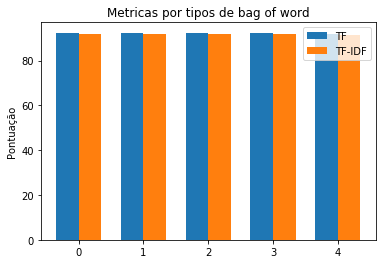

In [39]:
labels_numbers = np.arange(len(df_result.columns))  # the label locations
width_bar = 0.35  # the width of the bars

# Arredondar os valores das métricas para melhorar a visualização no plot.
tf_metrics_list = list(round(df_result.iloc[0] * 100, 2))
tf_idf_metrics_list = list(round(df_result.iloc[1] * 100, 2))


fig, ax = plt.subplots()
tf_group = ax.bar(labels_numbers - width_bar/2, tf_metrics_list, width_bar, label='TF')
tf_idf_group = ax.bar(labels_numbers + width_bar/2, tf_idf_metrics_list, width_bar, label='TF-IDF')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pontuação')
ax.set_title('Metricas por tipos de bag of word')
ax.set_xticks(labels_numbers, list(df_result.columns))
ax.legend()
ax.bar_label(tf_group, padding=3)
ax.bar_label(tf_idf_group, padding=3)
fig.tight_layout()
fig.set_size_inches(10, 6)

plt.show()